# Endangered Species of U.S. National Parks
Perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or \
themes to the types of species that become endangered.

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## Load Datasets

In [2]:
species_data = pd.read_csv('species_info.csv')
observation_data = pd.read_csv('observations.csv')

### Exploring The Datasets

#### Column names

In [3]:
print(species_data.columns, observation_data.columns, sep='\n\n')

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


#### Datatype and Row count of columns

In [4]:
species_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [5]:
observation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


#### First 5 rows

In [6]:
species_data.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [7]:
observation_data.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Descriptive statistics of columns

In [8]:
species_data.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [9]:
observation_data.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


#### Count of conservation statuses grouped by species category

In [11]:
category_count_by_status = species_data.groupby('conservation_status')['category'].value_counts()
category_count_by_status = category_count_by_status.unstack()

Text(0.5, 0, 'Conservation Status')

<Figure size 800x600 with 0 Axes>

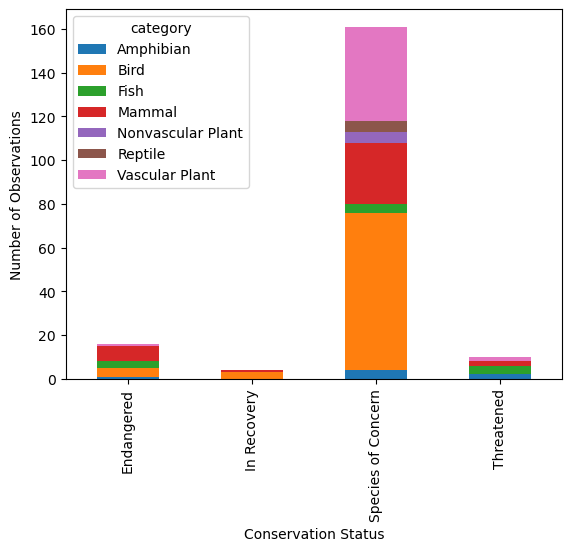

In [12]:
category_fig = plt.figure(figsize=(8,6))
category_ax = category_count_by_status.plot(kind='bar',stacked=True)
category_ax.set_ylabel('Number of Observations')
category_ax.set_xlabel('Conservation Status')

#### Species most spotted at each park

In [ ]:
max_observations_by_park_cols = observation_data.groupby(
    'park_name')['observations'].nlargest().unstack().columns
max_observations_by_park = observation_data.iloc[max_observations_by_park_cols].reset_index(drop=True)

##### Great Smoky Mountains National Park

In [75]:
smoky_mnts = max_observations_by_park[max_observations_by_park.park_name == 
                                      'Great Smoky Mountains National Park'].reset_index(drop=True)

for idx, sci_name in enumerate(smoky_mnts.scientific_name):
    smoky_mnts.loc[idx, 'common_names'] = species_data[species_data.scientific_name.isin(
        [sci_name])].common_names.values[0]
smoky_mnts

,scientific_name,park_name,observations,common_names
0,Sonchus asper ssp. asper,Great Smoky Mountains National Park,147,Spiny Sowthistle
1,Lespedeza violacea,Great Smoky Mountains National Park,146,Violet Bush-Clover
2,Festuca subulata,Great Smoky Mountains National Park,141,"Bearded Fescue, Nodding Fescue"
3,Branta hutchinsii,Great Smoky Mountains National Park,139,Cackling Goose
4,Botrychium dissectum,Great Smoky Mountains National Park,144,"Cutleaf Grape-Fern, Cut-Leaved Grape Fern"


##### Bryce National Park

In [78]:
bryce = max_observations_by_park[max_observations_by_park.park_name == 
                                 'Bryce National Park'].reset_index(drop=True)

for idx, sci_name in enumerate(bryce.scientific_name):
    bryce.loc[idx, 'common_names'] = species_data[species_data.scientific_name.isin(
        [sci_name])].common_names.values[0]
bryce

,scientific_name,park_name,observations,common_names
0,Draba oligosperma,Bryce National Park,167,"Fewseed Draba, Glacier Draba"
1,Martes americana,Bryce National Park,167,Pine Marten
2,Valerianella radiata,Bryce National Park,176,"Beaked Corn-Salad, Corn Salad"
3,Ericameria bloomeri,Bryce National Park,172,"Bloomer's Goldenbush, Rabbitbush"
4,Melilotus indica,Bryce National Park,173,Sourclover


##### Yosemite National Park

In [ ]:
yosemite = max_observations_by_park[max_observations_by_park.park_name == 
                                    'Yosemite National Park'].reset_index(drop=True)

for idx, sci_name in enumerate(yosemite.scientific_name):
    yosemite.loc[idx, 'common_names'] = species_data[species_data.scientific_name.isin(
        [sci_name])].common_names.values[0]
yosemite

,scientific_name,park_name,observations,common_names
0,Trillium rugelii,Yosemite National Park,219,Southern Nodding Trillium
1,Ivesia shockleyi var. shockleyi,Yosemite National Park,223,"Shockley's Ivesia, Sky Mousetail"
2,Lipocarpha micrantha,Yosemite National Park,222,"Dwarf Bulrush, Smallflower Halfchaff Sedge, Sm..."
3,Castilleja pallescens,Yosemite National Park,214,"Pale Indian Paintbrush, Pale Paintbrush"
4,Artemisia arbuscula ssp. arbuscula,Yosemite National Park,219,"Gray Low Sagebrush, Little Sagebrush"


##### Yellowstone National Park

In [ ]:
yellow = max_observations_by_park[max_observations_by_park.park_name == 
                                  'Yellowstone National Park'].reset_index(drop=True)

for idx, sci_name in enumerate(yellow.scientific_name):
    yellow.loc[idx, 'common_names'] = species_data[species_data.scientific_name.isin(
        [sci_name])].common_names.values[0]
yellow

,scientific_name,park_name,observations,common_names
0,Castilleja miniata,Yellowstone National Park,317,"Giant Red Indian Paintbrush, Great Red Indian ..."
1,Bidens tripartita,Yellowstone National Park,314,"Stick-Tight, Three-Lobe Beggar-Ticks"
2,Dracocephalum parviflorum,Yellowstone National Park,316,American Dragonhead
3,Lycopodium tristachyum,Yellowstone National Park,321,"Deep-Root Clubmoss, Ground Cedar"
4,Cryptantha fendleri,Yellowstone National Park,316,"Fendler's Cryptantha, Sanddune Catseye, Sanddu..."


### Species that are endangered